<a href="https://colab.research.google.com/github/alexandra-hidalgo/sqlite_database_operations/blob/main/Sqlite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import packages

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import sqlite3


# First Database analysis  

In [149]:
Presbyterian_Hospital = pd.read_json('https://raw.githubusercontent.com/hantswilliams/HHA_504_2023/main/WK3/data/nyp/133957095_NewYorkPresbyterianHospital_standardcharges.json')

In [150]:
Presbyterian_Hospital

,Code (CPT/DRG),Description,Rev Code,Inpatient/Outpatient,Gross Charges,Discounted Cash Price,Aetna,Cigna,Empire Blue Cross Blue Shield,Emblem Health,...,Consumer Health Network,Devon,Equian,First Health,Magnacare,Multiplan/Beechstreet/PHCS,QHM,Worldwide,Minimum Negotiated Charge,Maximum Negotiated Charge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.000000,866.000000,641.706,494.486,640.84,1388.424,...,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,393.5104,253.048250,1388.424000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.000000,358.000000,265.278,204.418,264.92,1305.112,...,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,162.6752,51.903250,1990.891341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.000000,1397.000000,1035.177,797.687,1033.78,1475.508,...,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,634.7968,253.048250,1475.508000
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,82.650750,1325.120000
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,355.2,1325.12,...,218.112,218.112,218.112,218.112,218.112,218.112,218.112,218.112,156.982800,1325.120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,184095.129020,184095.129020,86723.5232,98911.694706,82299.84,115129.89148,...,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,83652.826627,12561.144027,115129.891480
6189,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,85385.941857,85385.941857,57748.8352,65864.888166,63931.455093,76664.51828,...,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,38799.37198,7833.746854,76664.518280
6190,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,411665.999955,411665.999955,114736.9984,130862.199072,214294.876425,152319.20576,...,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,187061.03038,21016.798830,214294.876425
6191,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,126522.871140,126522.871140,58654.7264,66898.093812,91907.6928,77867.13496,...,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,57491.992646,10429.428059,91907.692800


In [ ]:
# Shape
Presbyterian_Hospital.shape

(6193, 47)

In [ ]:
# Columns
Presbyterian_Hospital.columns

Index(['Code (CPT/DRG)', 'Description', 'Rev Code', 'Inpatient/Outpatient',
       'Gross Charges', 'Discounted Cash Price', 'Aetna', 'Cigna',
       'Empire Blue Cross Blue Shield', 'Emblem Health', 'United Health Group',
       'Aetna Medicare', 'AgeWell Medicare', 'Emblem Medicare',
       'Empire Medicare', 'Fidelis Medicare', 'Healthfirst Medicare',
       'UHC Community Plan/United Medicare', 'VNS Medicare',
       'WellCare Medicare', '1199', 'Affinity Molina Essential',
       'Affinity Molina Medicaid/CHP', 'Amida Care Medicaid',
       'Emblem Medicaid/CHP', 'Empire Healthplus Essential',
       'Empire Healthplus Exchange', 'Empire Healthplus Medicaid/CHP',
       'Fidelis Essential/Exchange', 'Fidelis Medicaid/CHP',
       'Healthfirst Essential/Exchange', 'Healthfirst Medicaid/CHP',
       'MVP Medicaid/CHP', 'MVP Essential', 'United Community Plan Essential',
       'United Community Plan Medicaid', 'VNS Medicaid',
       'Consumer Health Network', 'Devon', 'Equian', 'Fir

In [ ]:
# Removing white spaces
Presbyterian_Hospital.columns = Presbyterian_Hospital.columns.str.strip()
Presbyterian_Hospital.columns

Index(['Code(CPT/DRG)', 'Description', 'RevCode', 'Inpatient/Outpatient',
       'GrossCharges', 'DiscountedCashPrice', 'Aetna', 'Cigna',
       'EmpireBlueCrossBlueShield', 'EmblemHealth', 'UnitedHealthGroup',
       'AetnaMedicare', 'AgeWellMedicare', 'EmblemMedicare', 'EmpireMedicare',
       'FidelisMedicare', 'HealthfirstMedicare',
       'UHCCommunityPlan/UnitedMedicare', 'VNSMedicare', 'WellCareMedicare',
       '1199', 'AffinityMolinaEssential', 'AffinityMolinaMedicaid/CHP',
       'AmidaCareMedicaid', 'EmblemMedicaid/CHP', 'EmpireHealthplusEssential',
       'EmpireHealthplusExchange', 'EmpireHealthplusMedicaid/CHP',
       'FidelisEssential/Exchange', 'FidelisMedicaid/CHP',
       'HealthfirstEssential/Exchange', 'HealthfirstMedicaid/CHP',
       'MVPMedicaid/CHP', 'MVPEssential', 'UnitedCommunityPlanEssential',
       'UnitedCommunityPlanMedicaid', 'VNSMedicaid', 'ConsumerHealthNetwork',
       'Devon', 'Equian', 'FirstHealth', 'Magnacare',
       'Multiplan/Beechstreet/PHCS

In [151]:
# Identifying missing values
missing_values = Presbyterian_Hospital.isna().sum()
print(missing_values)

Code (CPT/DRG)                          0
Description                             0
Rev Code                                0
Inpatient/Outpatient                    0
Gross Charges                           0
Discounted Cash Price                   0
Aetna                                   0
Cigna                                   0
Empire Blue Cross Blue Shield           0
Emblem Health                           0
United Health Group                     0
Aetna Medicare                          0
AgeWell Medicare                        0
Emblem Medicare                         0
Empire Medicare                         0
Fidelis Medicare                        0
Healthfirst Medicare                    0
UHC Community Plan/United Medicare      0
VNS Medicare                            0
WellCare Medicare                       0
1199                                    0
Affinity Molina Essential               0
Affinity Molina Medicaid/CHP            0
Amida Care Medicaid               

In [152]:
Presbyterian_Hospital['Inpatient/Outpatient']
Presbyterian_Hospital.dtypes

Code (CPT/DRG)                         object
Description                            object
Rev Code                               object
Inpatient/Outpatient                   object
Gross Charges                         float64
Discounted Cash Price                 float64
Aetna                                  object
Cigna                                  object
Empire Blue Cross Blue Shield          object
Emblem Health                          object
United Health Group                    object
Aetna Medicare                         object
AgeWell Medicare                       object
Emblem Medicare                        object
Empire Medicare                        object
Fidelis Medicare                       object
Healthfirst Medicare                   object
UHC Community Plan/United Medicare     object
VNS Medicare                           object
WellCare Medicare                      object
1199                                   object
Affinity Molina Essential         

In [153]:
# Descriptive statistics
descriptive_stats = Presbyterian_Hospital.describe()
print(descriptive_stats)

       Gross Charges  Discounted Cash Price  Minimum Negotiated Charge  \
count   6.193000e+03           6.193000e+03                5912.000000   
mean    3.385988e+04           3.385988e+04                2249.918880   
std     1.062409e+05           1.062409e+05                6015.717204   
min     1.000000e+00           1.000000e+00                   0.454400   
25%     5.970000e+02           5.970000e+02                 122.228437   
50%     3.925000e+03           3.925000e+03                 431.142905   
75%     3.033600e+04           3.033600e+04                2107.000000   
max     2.538980e+06           2.538980e+06              204861.126000   

       Maximum Negotiated Charge  
count               5.912000e+03  
mean                2.390277e+04  
std                 7.136503e+04  
min                 1.608000e+00  
25%                 6.380010e+02  
50%                 4.086731e+03  
75%                 1.925640e+04  
max                 1.713460e+06  


### Frequency counts

In [ ]:
from pandas.core.series import Frequency

frequency_counts = Presbyterian_Hospital['Inpatient/Outpatient'].value_counts()
print(frequency_counts)

Inpatient/Outpatient    5470
Inpatient                723
Name: Inpatient/Outpatient, dtype: int64


In [154]:
frequency_counts = Presbyterian_Hospital['Description'].value_counts()
print(frequency_counts)

KNEE ARTHROSCOPY/SURGERY                                                         16
REPAIR EYELID DEFECT                                                             12
CYSTOSCOPY AND TREATMENT                                                         12
TREAT HUMERUS FRACTURE                                                            9
SHOULDER ARTHROSCOPY/SURGERY                                                      7
                                                                                 ..
AMPUTATION TOE METATARSAL                                                         1
AMPUTATION THRU METATARSAL                                                        1
AMPUTATION OF MIDFOOT                                                             1
REVISION OF FOOT BONES                                                            1
NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIPAL DIAGNOSIS WITHOUT CC/MCC     1
Name: Description, Length: 5925, dtype: int64


In [ ]:
frequency_counts = Presbyterian_Hospital['Aetna'].value_counts()
print(frequency_counts)

9144                           1652
Not separately payable         1249
Included in Service Package     234
2846                            108
17784                            75
                               ... 
7747.896                          1
6860.178                          1
1469.403                          1
493.506                           1
38116.5824                        1
Name: Aetna, Length: 2111, dtype: int64


In [ ]:
frequency_counts = Presbyterian_Hospital['First Health'].value_counts()
print(frequency_counts)

Included in Service Package    234
Patient responsibility          47
55.4368                         32
1516.3328                       29
1160.0832                       27
                              ... 
9940                             1
9591.4752                        1
6383.8656                        1
12465.5552                       1
35025.8969869067                 1
Name: First Health, Length: 3988, dtype: int64


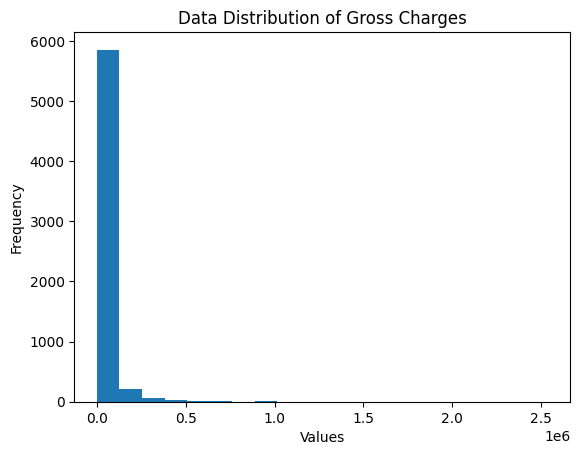

In [155]:
# Data distribution
plt.hist(Presbyterian_Hospital['Gross Charges'], bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Data Distribution of Gross Charges')
plt.show()

# SQlite

In [71]:

conn = sqlite3.connect('health.db')
c = conn.cursor()

In [ ]:
# Creating table
c.execute("""
            CREATE TABLE City_md
                (
                    location text,
                    procedure text,
                    code text,
                    cost_minimum real,
                    cost_maximum real
                );
          """)

conn.commit()

In [ ]:

c.execute('''
  SELECT name
  FROM sqlite_master
  WHERE type='table';
  ''')

c.fetchall()


[('City_md',)]

In [ ]:
c.execute('''
  SELECT * FROM City_md;
''')

print(c.fetchall())


[]


In [ ]:
# Inserting data
sql_query = """

INSERT INTO City_md (
  'location',
  'procedure',
  'code',
  'cost_minimum',
  'cost_maximum'
  )
  values (
    'levittown',
    'emergency',
    '22524',
    1.00,
    1000.00
  );

"""

print(sql_query)



INSERT INTO City_md (
  'location',
  'procedure',
  'code',
  'cost_minimum',
  'cost_maximum'
  )
  values (
    'levittown',
    'emergency',
    '22524',
    1.00,
    1000.00
  );




In [ ]:

c.execute(sql_query)
conn.commit()


In [72]:

sql_query_2 = """

select *
from City_md;

"""

c.execute(sql_query_2)
print(c.fetchall())


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
engine = create_engine('sqlite:///health.db')

pd.read_sql_query("select * from City_md;", conn)

,location,procedure,code,cost_minimum,cost_maximum
0,levittown,emergency,22524,1.0,1000.0


In [ ]:
Presbyterian_Hospital.to_sql('code', conn,
                             if_exists='replace', index=False)

6193

In [ ]:
columnNames = list(Presbyterian_Hospital)
idVars = columnNames[:8]
valueVars = columnNames[8:]

City_md_modified = Presbyterian_Hospital.melt(id_vars=idVars, value_vars=valueVars)

City_md_modified.columns

City_md_modified.rename(columns={'HospCode':'hospital_name',
            'variable':'insurance_type',
            'Code':'code',
            'Description':'code_description',
             'value':'cost_negotiated',
             'Minimum Negotiated Charge':'cost_minimum',
             'Maximum Negotiated Charge': 'cost_maximum'}, inplace=True)

City_md_modified['insurance_type'].value_counts()

City_md_modified

,Code (CPT/DRG),code_description,Rev Code,Inpatient/Outpatient,Gross Charges,Discounted Cash Price,Aetna,Cigna,insurance_type,cost_negotiated
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,866.000000,866.000000,641.706,494.486,Empire Blue Cross Blue Shield,640.84
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,358.000000,358.000000,265.278,204.418,Empire Blue Cross Blue Shield,264.92
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1397.000000,1397.000000,1035.177,797.687,Empire Blue Cross Blue Shield,1033.78
3,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,Empire Blue Cross Blue Shield,355.2
4,96368,HC IV INFUSION FOR THER/PROPH/DIAG CONCURRENT,0260,Inpatient/Outpatient,480.000000,480.000000,355.68,274.08,Empire Blue Cross Blue Shield,355.2
...,...,...,...,...,...,...,...,...,...,...
241522,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,184095.129020,184095.129020,86723.5232,98911.694706,Maximum Negotiated Charge,115129.89148
241523,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,85385.941857,85385.941857,57748.8352,65864.888166,Maximum Negotiated Charge,76664.51828
241524,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,411665.999955,411665.999955,114736.9984,130862.199072,Maximum Negotiated Charge,214294.876425
241525,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,126522.871140,126522.871140,58654.7264,66898.093812,Maximum Negotiated Charge,91907.6928


In [ ]:
City_md_modified.to_sql('City_md', conn, if_exists='replace')

241527

# Second database analysis

In [96]:
North_Shore = pd.read_csv('/83-1728077_Northshore_Rehabilitation_Hospital_standardcharges.csv')
North_Shore

,CHARGE_CODE,CHARGE_DESCRIPTION,CHARGE,REVENUE_CODE,CPT_CODE,PHARMACY_NDC
0,3001023,ROOM & BOARD 8NCH,1977.14,128.0,NaN,NaN
1,3001024,ROOM & BOARD 10NCH,4410.54,128.0,NaN,NaN
2,3001026,ROOM & BOARD 5.5NCH,1672.96,128.0,NaN,NaN
3,3001027,ROOM & BOARD 6.5NCH,1977.14,128.0,NaN,NaN
4,3001028,ROOM & BOARD 6.5NCH,1977.14,128.0,NaN,NaN
...,...,...,...,...,...,...
54688,4965778,POLYETHYLENE GLYCOL 3350 17 GM/SCOOP PO POWD,0.50,NaN,NaN,6217519531
54689,4965781,ZONISAMIDE SUSPENSION 10 MG/ML,29.90,NaN,NaN,9999101892
54690,4965782,PREDNISONE 5 MG/ML PO CONC,20.80,NaN,NaN,9999101893
54691,4965787,CYCLOSPORINE MODIFIED 100 MG/ML PO SOLN,47.10,NaN,NaN,9999101896


In [97]:
# Shape
North_Shore.shape

(54693, 6)

In [98]:
# Columns
North_Shore.columns

Index(['CHARGE_CODE', 'CHARGE_DESCRIPTION', 'CHARGE', 'REVENUE_CODE',
       'CPT_CODE', 'PHARMACY_NDC'],
      dtype='object')

In [99]:
# Identifying missing values
missing_values = North_Shore.isna().sum()
print(missing_values)

CHARGE_CODE               0
CHARGE_DESCRIPTION       11
CHARGE                    0
REVENUE_CODE          52728
CPT_CODE              53192
PHARMACY_NDC           1968
dtype: int64


In [100]:
North_Shore['CHARGE_CODE']
North_Shore.dtypes

CHARGE_CODE             int64
CHARGE_DESCRIPTION     object
CHARGE                float64
REVENUE_CODE          float64
CPT_CODE               object
PHARMACY_NDC           object
dtype: object

In [101]:
# Statistics
descriptive_stats = North_Shore.describe()
print(descriptive_stats)



        CHARGE_CODE         CHARGE  REVENUE_CODE
count  5.469300e+04   54693.000000   1965.000000
mean   4.919359e+06      54.107307    329.461578
std    2.008249e+05     819.951923    108.353044
min    3.001023e+06       0.010000    113.000000
25%    4.950644e+06       3.000000    270.000000
50%    4.951130e+06       6.000000    300.000000
75%    4.953581e+06      20.520000    320.000000
max    9.219213e+06  175120.000000    960.000000


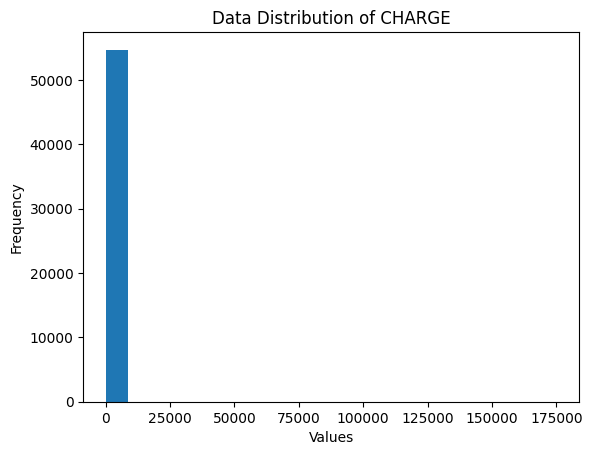

In [108]:
# Data distribution
plt.hist(North_Shore['CHARGE'], bins=20)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Data Distribution of CHARGE')
plt.show()

## Frequency counts

In [104]:
from pandas.core.series import Frequency

frequency_counts = North_Shore['CHARGE_CODE'].value_counts()
print(frequency_counts)

4950747    280
4950708    272
4950776    255
4953171    252
4950704    231
          ... 
4368018      1
4368017      1
4368016      1
4368015      1
9219213      1
Name: CHARGE_CODE, Length: 7553, dtype: int64


In [105]:
frequency_counts = North_Shore['CHARGE_DESCRIPTION'].value_counts()
print(frequency_counts)

GABAPENTIN 300 MG PO CAPS            280
CYCLOBENZAPRINE HCL 10 MG PO TABS    272
TRAMADOL HCL 50 MG PO TABS           255
IBUPROFEN 800 MG PO TABS             252
CARISOPRODOL 350 MG PO TABS          231
                                    ... 
COAGULATION TIME                       1
FIBRIN SPLIT SEMIQUA                   1
D-DIMER QUANT                          1
PLATELET AGGREGATION                   1
CYMBALTA 20MG                          1
Name: CHARGE_DESCRIPTION, Length: 5952, dtype: int64


In [106]:
frequency_counts = North_Shore['CHARGE'].value_counts()
print(frequency_counts)

3.00      17327
0.50       3244
6.00       2430
1.00        363
10.00       106
          ...  
799.76        1
399.84        1
37.90         1
462.69        1
3.58          1
Name: CHARGE, Length: 6144, dtype: int64


In [109]:
frequency_counts = North_Shore['REVENUE_CODE'].value_counts()
print(frequency_counts)

300.0    655
270.0    503
301.0    127
320.0    103
420.0     66
        ... 
449.0      1
443.0      1
133.0      1
203.0      1
250.0      1
Name: REVENUE_CODE, Length: 68, dtype: int64


In [110]:
frequency_counts = North_Shore['CPT_CODE'].value_counts()
print(frequency_counts)

87070    14
97150    11
86255    10
80299    10
97110     8
         ..
77300     1
77334     1
77003     1
77331     1
97803     1
Name: CPT_CODE, Length: 1035, dtype: int64


In [111]:
frequency_counts = North_Shore['PHARMACY_NDC'].value_counts()
print(frequency_counts)

7043600704    3
527410737     3
6968011530    2
409141240     2
6068732811    2
             ..
4335308192    1
4596355711    1
4948360750    1
6878876141    1
9999101896    1
Name: PHARMACY_NDC, Length: 52636, dtype: int64


#SQLite

In [112]:
conn = sqlite3.connect('health2.db')
c = conn.cursor()

### Creating a table with a North Shore Levittown location

In [114]:
# Creating table
c.execute("""
            CREATE TABLE Levittown
                (
                    code_procedure text,
                    procedure text,
                    insurance text,
                    gross_charge real,
                    discounted_charge real
                );
          """)

conn.commit()

In [115]:
c.execute('''
  SELECT name
  FROM sqlite_master
  WHERE type='table';
  ''')

c.fetchall()

[('Levittown',)]

In [116]:
c.execute('''
  SELECT * FROM Levittown;
''')

print(c.fetchall())

[]


In [121]:
# Inserting data
sql_query = """

INSERT INTO Levittown (
  'code_procedure',
  'procedure',
  'insurance',
  'gross_charge',
  'discounted_charge'
  )
  values (
    '23476',
    'c_section',
    'aetna',
    1000.00,
    1.00
  );

"""

print(sql_query)



INSERT INTO Levittown (
  'code_procedure',
  'procedure',
  'insurance',
  'gross_charge',
  'discounted_charge'
  )
  values (
    '23476',
    'c_section',
    'aetna',
    1000.00,
    1.00
  );




In [122]:
c.execute(sql_query)
conn.commit()


In [123]:
sql_query_2 = """

select *
from Levittown;

"""

c.execute(sql_query_2)
print(c.fetchall())

[('23476', 'c_section', 'aetna', 1.0, 1000.0), ('23476', 'c_section', 'aetna', 1000.0, 1.0)]


In [124]:
engine = create_engine('sqlite:///health2.db')

pd.read_sql_query("select * from Levittown;", conn)

,code_procedure,procedure,insurance,gross_charge,discounted_charge
0,23476,c_section,aetna,1.0,1000.0
1,23476,c_section,aetna,1000.0,1.0


In [125]:
North_Shore.to_sql('code', conn,
                             if_exists='replace', index=False)

54693

In [132]:
columnNames = list(North_Shore)
idVars = columnNames[:8]
valueVars = columnNames[8:]

Levittown_modified = North_Shore.melt(id_vars=idVars, value_vars=valueVars)

Levittown_modified.columns

Levittown_modified.rename(columns={'HospCode':'code_procedure',
            'variable':'insurance',
            'Description':'procedure',
             'Minimum Negotiated Charge':'discounted_charge',
             'Maximum Negotiated Charge': 'gross_charge'}, inplace=True)

Levittown_modified['insurance'].value_counts()

Levittown_modified

,CHARGE_CODE,CHARGE_DESCRIPTION,CHARGE,REVENUE_CODE,CPT_CODE,PHARMACY_NDC,insurance,value


In [128]:
Levittown_modified.to_sql('Levittown', conn, if_exists='replace')

0